# TITANIC DATASET 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Data

In [2]:
titanic_da = pd.read_csv('train.csv')
titanic_da.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_da = pd.read_csv('test.csv')
test_da.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Analyzing Data - Visualization

### Analyzing the missing Data in Train Dataset

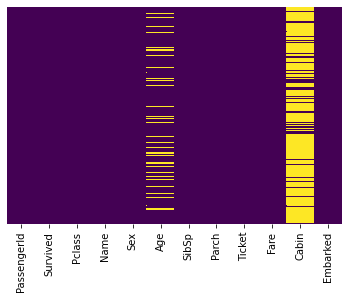

In [4]:
sns.heatmap(titanic_da.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Analyzing the missing Data in Test Dataset

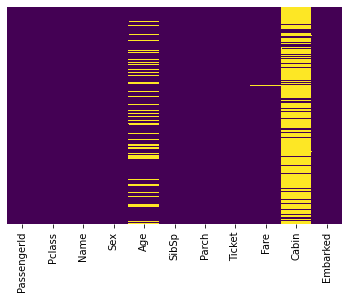

In [5]:
sns.heatmap(test_da.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We have missing datas in the Age and Cabin section

### Survived Vs Not Survived in Train Dataset

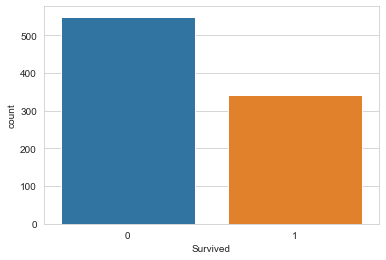

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic_da)

This plot shows the number of people survived and not survived

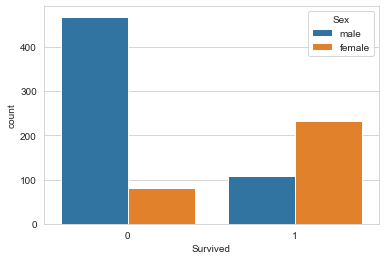

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic_da)

This graph represents the survival count in male and female separately

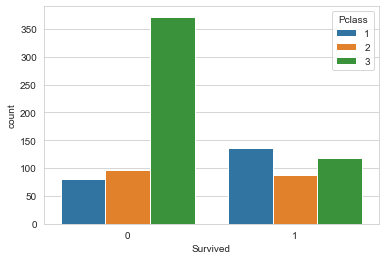

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic_da)

Similarly, It shows the survival count in Pclass categories

### Distribution 

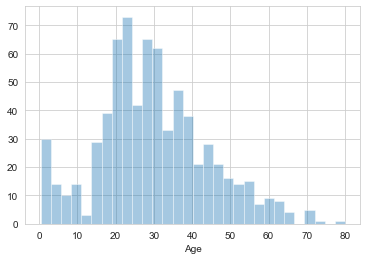

In [9]:
sns.distplot(titanic_da['Age'].dropna(),kde=False,bins=30)

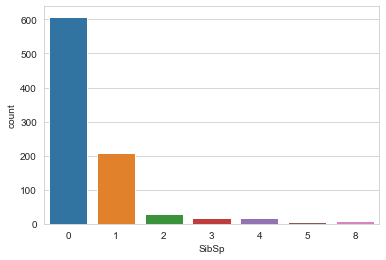

In [10]:
sns.countplot(x='SibSp',data=titanic_da)

## Data Cleaning

It is necessary to clean the data, which means converting the data to the form used by computer to produce the possibily good result. 

### Managing the Missing Data

We have missing data in the 'Age' and 'Cabin' column. It is necessary to make up with missing data in both the columns. 

We can relate the Age and Pclass. First we will find the average of Age of each Pclass, then fill the missinage age with the average age value of respective Pclass

### Train Dataset

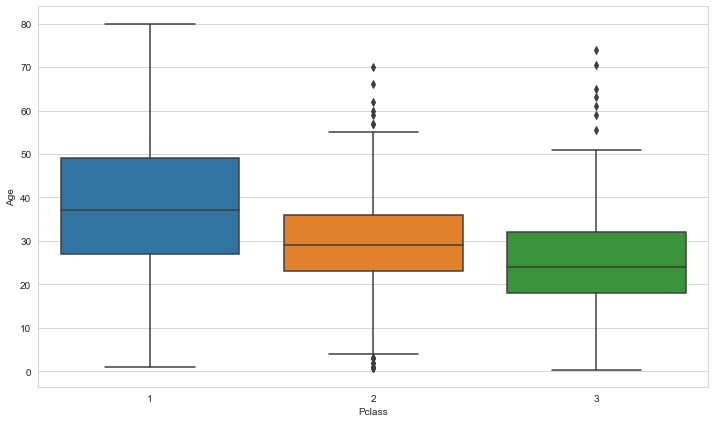

In [11]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=titanic_da)

In [12]:
def age_pag(col):
    Age=col[0]
    Pclass=col[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [13]:
titanic_da['Age'] = titanic_da[['Age','Pclass']].apply(age_pag,axis=1)

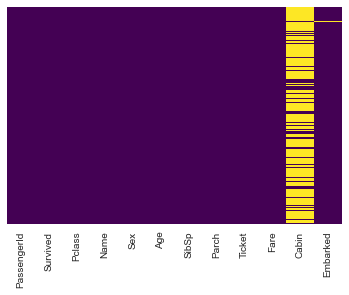

In [14]:
sns.heatmap(titanic_da.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
titanic_da.drop('Cabin',axis=1,inplace=True)

In [16]:
titanic_da.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Test Dataset

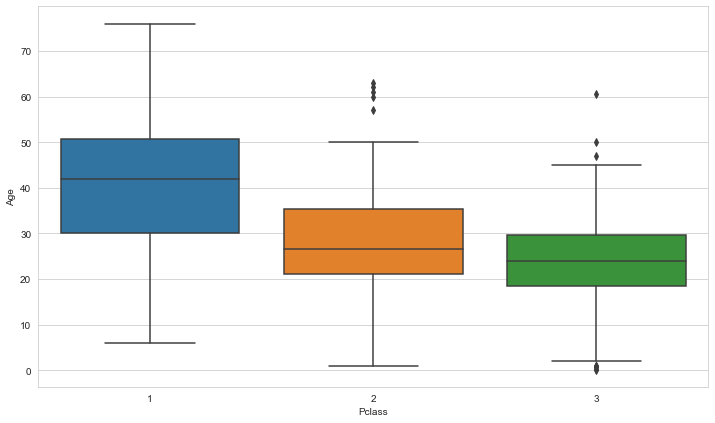

In [17]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=test_da)

In [18]:
def age_pag_test(col):
    Age=col[0]
    Pclass=col[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        if Pclass==2:
            return 26
        else:
            return 24
    else:
        return Age

In [19]:
test_da['Age'] = test_da[['Age','Pclass']].apply(age_pag_test,axis=1)

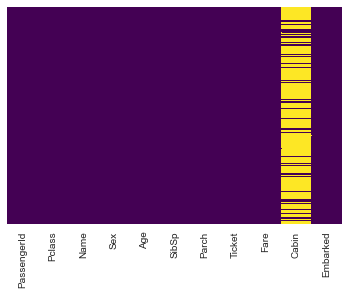

In [20]:
sns.heatmap(test_da.isnull(),yticklabels=False,cbar=False,cmap='viridis')

since cabin values involves alphaneweric values, we can drop it for now

In [21]:
test_da.drop('Cabin',axis=1,inplace=True)

In [22]:
test_da.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


### Converting Alpha values to Numerical Values

Let's convert Sex column into numerical values

In [23]:
def gender(cols):
    Gen = cols[0]
    
    if Gen == 'male':
        return 1
    else:
        return 0

In [24]:
titanic_da['Male'] = titanic_da[['Sex']].apply(gender,axis=1)

In [25]:
test_da['Male'] = test_da[['Sex']].apply(gender,axis=1)

In [26]:
titanic_da.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [27]:
test_da.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


In [28]:
emb = pd.get_dummies(titanic_da['Embarked'],drop_first=True)

In [29]:
embd = pd.get_dummies(test_da['Embarked'],drop_first=True)

In [30]:
titanic_da.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [31]:
test_da.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [32]:
titanic_df = pd.concat([titanic_da,emb],axis=1)

In [33]:
test_df = pd.concat([test_da,embd],axis=1)

In [34]:
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [35]:
import random
k = random.uniform(min(test_da['Fare']),max(test_da['Fare']))
def no_fill(col):
    Fare = col[0]
    
    if pd.isnull(Fare):
        return k
    else:
        return Fare
    

In [36]:
test_df['Fare'] = test_df[['Fare']].apply(no_fill,axis=1)

# LOGISTIC REGRESSION MODEL

## Train Test

In [37]:
X_train = titanic_df.drop('Survived',axis=1)
X_test = test_df
y_train = titanic_df['Survived']

## Prediction

In [38]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [39]:
df_fit = lg.fit(X_train,y_train)

C:\Users\aravi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
pred = df_fit.predict(X_test)

In [41]:
prediciton = pd.DataFrame(pred)

In [42]:
prediciton.columns = ['Survived']

## Evaluation

In [46]:
final = pd.concat([X_test['PassengerId'],prediciton],axis=1)

In [54]:
final[['PassengerId','Survived']].to_csv('Titanic_Final_Submission.csv')